In [225]:
#Importing required libraries.

import pandas as pd
%matplotlib inline
import numpy as np

In [236]:
# Importing transformed data excel sheet as pandas DataFrame.

df1 = pd.read_excel("D:\internship work\device_data (29dec2022-06jan2023).xlsx")

In [237]:
# Getting a look over dataframe.

df1.head()

,deviceid,sensor no.,dt_time,coop1,coop2,gain factor,total sensor nA signal,sensitivity,sensor gas value ppm,ppb equivalent value
0,48551903D2CB,162800740,2022-12-29 13:00:00,243.500000,440.500000,0.8,246.250000,621,0.396538,396.537842
1,48551903D2CB,162800740,2022-12-29 13:15:00,116.666667,3218.133333,0.8,3876.833333,621,6.242888,6242.887815
2,48551903D2CB,162800740,2022-12-29 13:30:00,41.866667,456.800000,0.8,518.666667,621,0.835212,835.212024
3,48551903D2CB,162800740,2022-12-29 13:45:00,55.066667,433.066667,0.8,472.500000,621,0.760870,760.869565
4,48551903D2CB,162800740,2022-12-29 14:00:00,171.533333,758.733333,0.8,734.000000,621,1.181965,1181.964573


In [250]:
# Importing CPCB data as pandas DataFrame.

df2 = pd.read_excel("D:\internship work\device_data (29dec2022-06jan2023).xlsx", sheet_name="reference")

In [251]:
# Getting a look over dataframe.

df2.head()

,From Date,To Date,CO
0,29-12-2022 00:00,29-12-2022 00:15,2.7
1,29-12-2022 00:15,29-12-2022 00:30,2.68
2,29-12-2022 00:30,29-12-2022 00:45,2.62
3,29-12-2022 00:45,29-12-2022 01:00,2.6
4,29-12-2022 01:00,29-12-2022 01:15,2.61


In [258]:
 # Removing "To Date" column.
#df2.drop(["To Date"],axis = 1, inplace = True)

# Converting the "From Date" column to date-time format and providing a specific date-time format.
df2['From Date'] =  pd.to_datetime(df2['From Date'], format='%d-%m-%Y %H:%M')

# Renaming the "From Date" column to "dt_time".
df2.rename(columns = {'From Date':'dt_time'},inplace = True)

# Getting a look over on changes has been made. 
df2.head()

,dt_time,CO
0,2022-12-29 00:00:00,2.7
1,2022-12-29 00:15:00,2.68
2,2022-12-29 00:30:00,2.62
3,2022-12-29 00:45:00,2.6
4,2022-12-29 01:00:00,2.61


In [259]:
# Checking the data type of DataFrame.
df2.dtypes

dt_time    datetime64[ns]
CO                 object
dtype: object

In [260]:
# Importing ATMOS data having rh,humidity and temperature as pandas DataFrame.

df3 = pd.read_excel("D:\internship work\device_data with rh,humidity and temp.xlsx")

In [261]:
# Getting a look over dataframe.
df3.head()

,dt_time,coop1,coop2,rh,humidity,temp,deviceid
0,2022-12-29 13:00:00,243.500000,440.500000,0,22.333333,43.900000,48551903D2CB
1,2022-12-29 13:15:00,116.666667,3218.133333,0,28.426667,39.353333,48551903D2CB
2,2022-12-29 13:30:00,41.866667,456.800000,0,29.373333,37.460000,48551903D2CB
3,2022-12-29 13:45:00,55.066667,433.066667,0,33.073333,37.120000,48551903D2CB
4,2022-12-29 14:00:00,171.533333,758.733333,0,36.853333,37.033333,48551903D2CB


In [262]:
# Merging dataframe1 and dataframe3 to have transformed data set and rh,humidity and temperature values in one DataFreame 

df4 = pd.merge(df1, df3, on = ["dt_time","coop1","coop2","deviceid"], how = "outer")

In [265]:
# Getting a look over dataframe.
df4.head()

,deviceid,sensor no.,dt_time,coop1,coop2,gain factor,total sensor nA signal,sensitivity,sensor gas value ppm,ppb equivalent value,rh,humidity,temp
0,48551903D2CB,162800740.0,2022-12-29 13:00:00,243.500000,440.500000,0.8,246.250000,621.0,0.396538,396.537842,0,22.333333,43.900000
1,48551903D2CB,162800740.0,2022-12-29 13:15:00,116.666667,3218.133333,0.8,3876.833333,621.0,6.242888,6242.887815,0,28.426667,39.353333
2,48551903D2CB,162800740.0,2022-12-29 13:30:00,41.866667,456.800000,0.8,518.666667,621.0,0.835212,835.212024,0,29.373333,37.460000
3,48551903D2CB,162800740.0,2022-12-29 13:45:00,55.066667,433.066667,0.8,472.500000,621.0,0.760870,760.869565,0,33.073333,37.120000
4,48551903D2CB,162800740.0,2022-12-29 14:00:00,171.533333,758.733333,0.8,734.000000,621.0,1.181965,1181.964573,0,36.853333,37.033333


In [266]:
# Checking the size of DataFrame.
df4.shape

(3105, 13)

In [267]:
# Removing all the rows from DataFrame having 0 values for coop1 and coop2.
index = df4[ (df4['coop1'] == 0) & (df4['coop2'] == 0) ].index
df4.drop(index, inplace=True)

# Removing column "rh" form DataFreame because it is having all the values as 0.
df4.drop(["rh"], axis = 1, inplace = True)

In [268]:
# Checking the size of DataFrame.
df4.shape

(2856, 12)

In [272]:
# Converting the "dt_time" column to date-time format and providing a specific date-time format.
df4['dt_time'] =  pd.to_datetime(df4['dt_time'],format='%Y-%m-%d %H:%M')


In [270]:
# Checking the data type of DataFrame.
df4.dtypes

deviceid                          object
sensor no.                       float64
dt_time                   datetime64[ns]
coop1                            float64
coop2                            float64
gain factor                      float64
total sensor nA signal           float64
sensitivity                      float64
sensor gas value ppm             float64
ppb equivalent value             float64
humidity                         float64
temp                             float64
dtype: object

In [273]:
# Merging CPCB data with ATMOS data to create one final dataframe having all the features we need.
final_df = pd.merge(df4, df2, on = ["dt_time"], how = "outer")

In [275]:
final_df.head()

,deviceid,sensor no.,dt_time,coop1,coop2,gain factor,total sensor nA signal,sensitivity,sensor gas value ppm,ppb equivalent value,humidity,temp,CO
0,48551903D2CB,162800740.0,2022-12-29 13:00:00,243.500000,440.500000,0.8,246.250000,621.0,0.396538,396.537842,22.333333,43.900000,1.29
1,485519C84D2E,162800739.0,2022-12-29 13:00:00,187.909091,548.272727,0.8,450.454545,585.0,0.770008,770.007770,22.209091,44.763636,1.29
2,4091514F1FB1,162800734.0,2022-12-29 13:00:00,243.285714,478.428571,0.8,293.928571,543.0,0.541305,541.304920,24.585714,41.978571,1.29
3,48551903D8F9,162800737.0,2022-12-29 13:00:00,151.750000,524.000000,0.8,465.312500,616.0,0.755377,755.377435,25.900000,41.288889,1.29
4,48551903D2CB,162800740.0,2022-12-29 13:15:00,116.666667,3218.133333,0.8,3876.833333,621.0,6.242888,6242.887815,28.426667,39.353333,1.29


In [299]:
final_df.describe()

,sensor no.,sensor gas value ppm
count,2.856000e+03,2856.000000
mean,1.628007e+08,0.890591
std,2.289377e+00,0.599172
min,1.628007e+08,-0.147944
25%,1.628007e+08,0.613359
50%,1.628007e+08,0.827820
75%,1.628007e+08,1.100686
max,1.628007e+08,15.316656


In [278]:
# Dropping all unrequired columns to begin the co-relation analysis.
final_df.drop(final_df.columns[[0,3,4,5,6,7,9,10,11]], axis=1, inplace=True)

# Getting a look over dataframe.
final_df.head()

,sensor no.,dt_time,sensor gas value ppm,CO
0,162800740.0,2022-12-29 13:00:00,0.396538,1.29
1,162800739.0,2022-12-29 13:00:00,0.770008,1.29
2,162800734.0,2022-12-29 13:00:00,0.541305,1.29
3,162800737.0,2022-12-29 13:00:00,0.755377,1.29
4,162800740.0,2022-12-29 13:15:00,6.242888,1.29


In [298]:
# Reshaping the data to get all the sensors as columns and their values as rows.
reshaped_df = final_df.pivot(index=['dt_time','CO'],columns='sensor no.')['sensor gas value ppm'].reset_index()
reshaped_df.columns.name = None

# Replacing "None" values form "CO" column to NaN for changing the data type of "CO" column.
reshaped_df['CO'].replace('None', np.nan, inplace=True)

# Changing "CO" column type to numeric from object. 
reshaped_df['CO'] = pd.to_numeric(reshaped_df['CO'])

 Checking the data type of DataFrame
print(reshaped_df.dtypes)

# Getting a look over dataframe.
reshaped_df.head()

dt_time      datetime64[ns]
CPCB_data           float64
162800734           float64
162800735           float64
162800737           float64
162800739           float64
162800740           float64
dtype: object


,dt_time,CPCB_data,162800734,162800735,162800737,162800739,162800740
0,2022-12-29 00:00:00,2.70,NaN,NaN,NaN,NaN,NaN
1,2022-12-29 00:15:00,2.68,NaN,NaN,NaN,NaN,NaN
2,2022-12-29 00:30:00,2.62,NaN,NaN,NaN,NaN,NaN
3,2022-12-29 00:45:00,2.60,NaN,NaN,NaN,NaN,NaN
4,2022-12-29 01:00:00,2.61,NaN,NaN,NaN,NaN,NaN


In [280]:
# Removing the "NaN" column from DataFrame formed due to reshaping of DataFrame.
reshaped_df.drop(reshaped_df.columns[[2]], axis=1, inplace=True)

# Getting a look over dataframe.
reshaped_df.head(80)

,dt_time,CO,162800734.0,162800735.0,162800737.0,162800739.0,162800740.0
0,2022-12-29 00:00:00,2.70,NaN,NaN,NaN,NaN,NaN
1,2022-12-29 00:15:00,2.68,NaN,NaN,NaN,NaN,NaN
2,2022-12-29 00:30:00,2.62,NaN,NaN,NaN,NaN,NaN
3,2022-12-29 00:45:00,2.60,NaN,NaN,NaN,NaN,NaN
4,2022-12-29 01:00:00,2.61,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
75,2022-12-29 18:45:00,1.25,0.991713,1.045826,0.918966,0.960826,NaN
76,2022-12-29 19:00:00,1.25,1.071977,1.127609,0.995400,1.045299,NaN
77,2022-12-29 19:15:00,1.27,1.074279,1.149323,1.003382,1.051282,NaN
78,2022-12-29 19:30:00,1.30,1.049417,1.127750,0.984848,1.032051,NaN


In [282]:
# Renaming the columns.
reshaped_df.columns = ['dt_time', 'CPCB_data', '162800734','162800735','162800737','162800739','162800740']

# Getting a look over dataframe.
reshaped_df.head()

,dt_time,CPCB_data,162800734,162800735,162800737,162800739,162800740
0,2022-12-29 00:00:00,2.70,NaN,NaN,NaN,NaN,NaN
1,2022-12-29 00:15:00,2.68,NaN,NaN,NaN,NaN,NaN
2,2022-12-29 00:30:00,2.62,NaN,NaN,NaN,NaN,NaN
3,2022-12-29 00:45:00,2.60,NaN,NaN,NaN,NaN,NaN
4,2022-12-29 01:00:00,2.61,NaN,NaN,NaN,NaN,NaN


In [300]:
reshaped_df.describe()

,CPCB_data,162800734,162800735,162800737,162800739,162800740
count,795.000000,662.000000,281.000000,658.000000,661.000000,594.000000
mean,1.607547,0.924560,0.971344,0.831337,0.911117,0.857328
std,0.427862,0.891415,0.417689,0.410894,0.550001,0.476169
min,0.650000,-0.147944,0.146362,-0.115666,0.086081,-0.144525
25%,1.300000,0.608617,0.650310,0.589827,0.653846,0.596216
50%,1.620000,0.839779,0.925550,0.795049,0.833048,0.812332
75%,1.920000,1.127609,1.189227,1.058239,1.099573,1.064077
max,2.700000,15.316656,2.204738,2.343750,10.234509,6.242888


array([[<AxesSubplot:xlabel='CPCB_data', ylabel='CPCB_data'>,
        <AxesSubplot:xlabel='162800734', ylabel='CPCB_data'>,
        <AxesSubplot:xlabel='162800735', ylabel='CPCB_data'>,
        <AxesSubplot:xlabel='162800737', ylabel='CPCB_data'>,
        <AxesSubplot:xlabel='162800739', ylabel='CPCB_data'>,
        <AxesSubplot:xlabel='162800740', ylabel='CPCB_data'>],
       [<AxesSubplot:xlabel='CPCB_data', ylabel='162800734'>,
        <AxesSubplot:xlabel='162800734', ylabel='162800734'>,
        <AxesSubplot:xlabel='162800735', ylabel='162800734'>,
        <AxesSubplot:xlabel='162800737', ylabel='162800734'>,
        <AxesSubplot:xlabel='162800739', ylabel='162800734'>,
        <AxesSubplot:xlabel='162800740', ylabel='162800734'>],
       [<AxesSubplot:xlabel='CPCB_data', ylabel='162800735'>,
        <AxesSubplot:xlabel='162800734', ylabel='162800735'>,
        <AxesSubplot:xlabel='162800735', ylabel='162800735'>,
        <AxesSubplot:xlabel='162800737', ylabel='162800735'>,
      

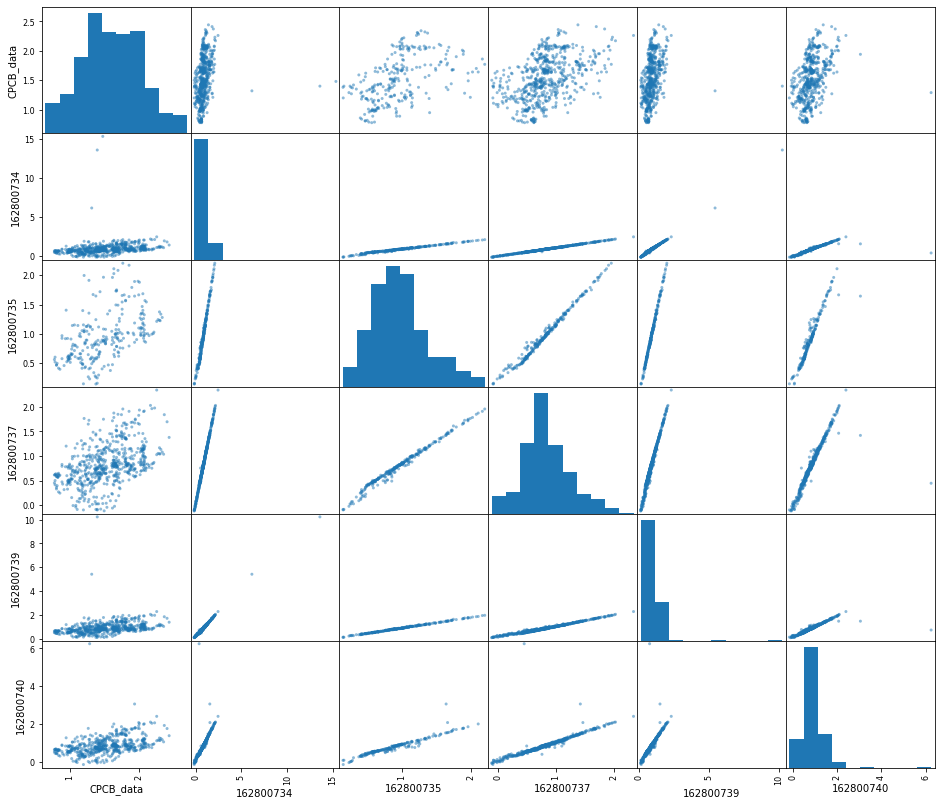

In [284]:
# plotting scatter matrix to know the co-relation between CPCb data and ATMOS data.
pd.plotting.scatter_matrix(reshaped_df,figsize=(16,14))

In [ ]:
# Importing seaborn library to visualise scatter matrix with linear regression.
import seaborn as sns

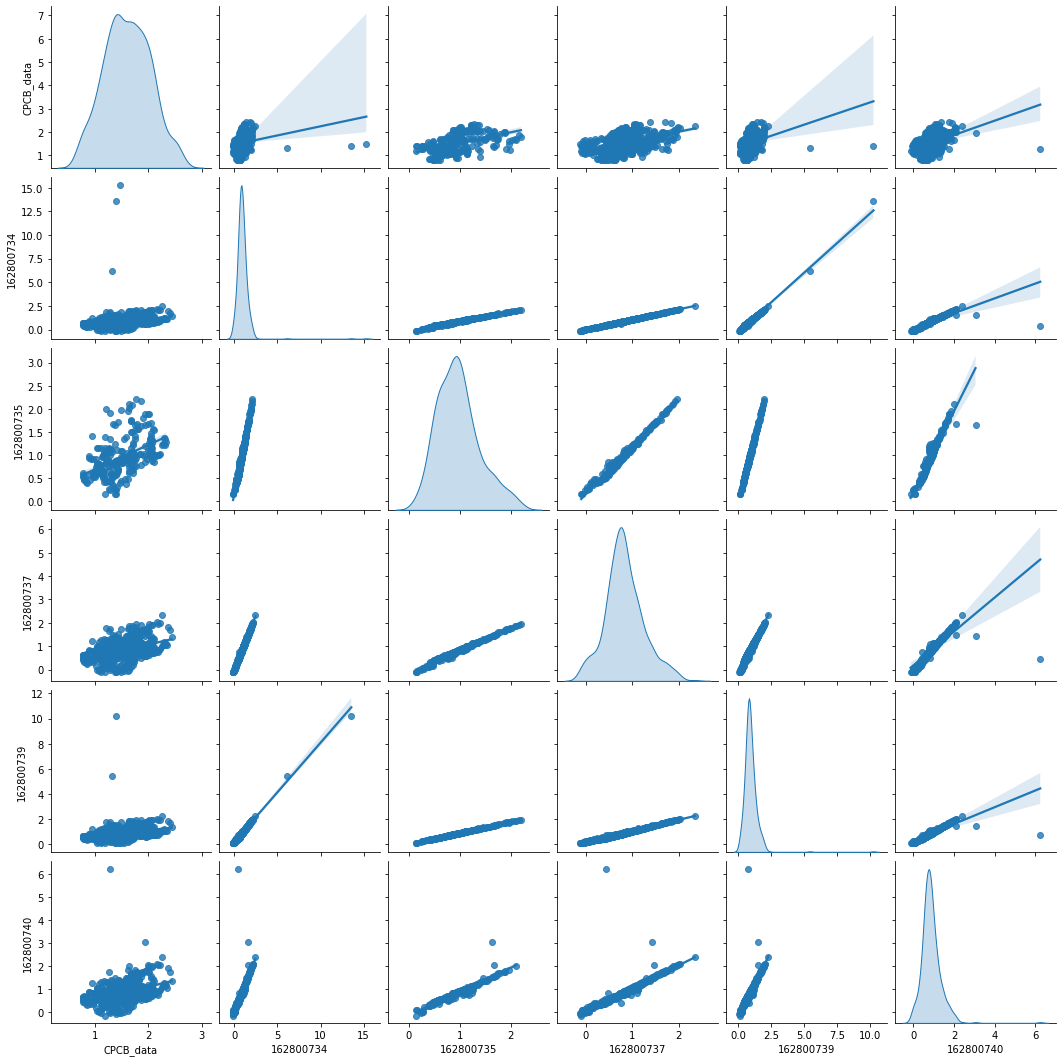

In [285]:
sns.pairplot(reshaped_df,kind='reg',diag_kind='kde')

<AxesSubplot:>

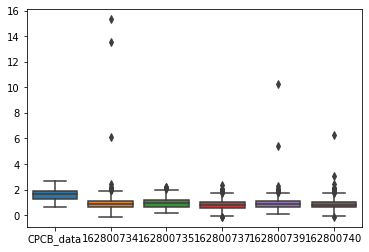

In [286]:
sns.boxplot(data=reshaped_df)

In [290]:
reshaped_df['162800735'].mean()

0.971344285024126

In [293]:
reshaped_df5=reshaped_df[reshaped_df['162800734']<2]
reshaped_df5=reshaped_df[reshaped_df['162800735']<2]
reshaped_df5=reshaped_df[reshaped_df['162800737']<2]
reshaped_df5=reshaped_df[reshaped_df['162800739']<2]
reshaped_df5=reshaped_df[reshaped_df['162800740']<2]


<AxesSubplot:>

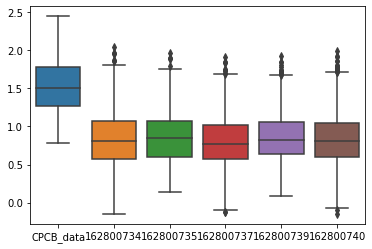

In [294]:
sns.boxplot(data=reshaped_df5)

array([[<AxesSubplot:xlabel='CPCB_data', ylabel='CPCB_data'>,
        <AxesSubplot:xlabel='162800734', ylabel='CPCB_data'>,
        <AxesSubplot:xlabel='162800735', ylabel='CPCB_data'>,
        <AxesSubplot:xlabel='162800737', ylabel='CPCB_data'>,
        <AxesSubplot:xlabel='162800739', ylabel='CPCB_data'>,
        <AxesSubplot:xlabel='162800740', ylabel='CPCB_data'>],
       [<AxesSubplot:xlabel='CPCB_data', ylabel='162800734'>,
        <AxesSubplot:xlabel='162800734', ylabel='162800734'>,
        <AxesSubplot:xlabel='162800735', ylabel='162800734'>,
        <AxesSubplot:xlabel='162800737', ylabel='162800734'>,
        <AxesSubplot:xlabel='162800739', ylabel='162800734'>,
        <AxesSubplot:xlabel='162800740', ylabel='162800734'>],
       [<AxesSubplot:xlabel='CPCB_data', ylabel='162800735'>,
        <AxesSubplot:xlabel='162800734', ylabel='162800735'>,
        <AxesSubplot:xlabel='162800735', ylabel='162800735'>,
        <AxesSubplot:xlabel='162800737', ylabel='162800735'>,
      

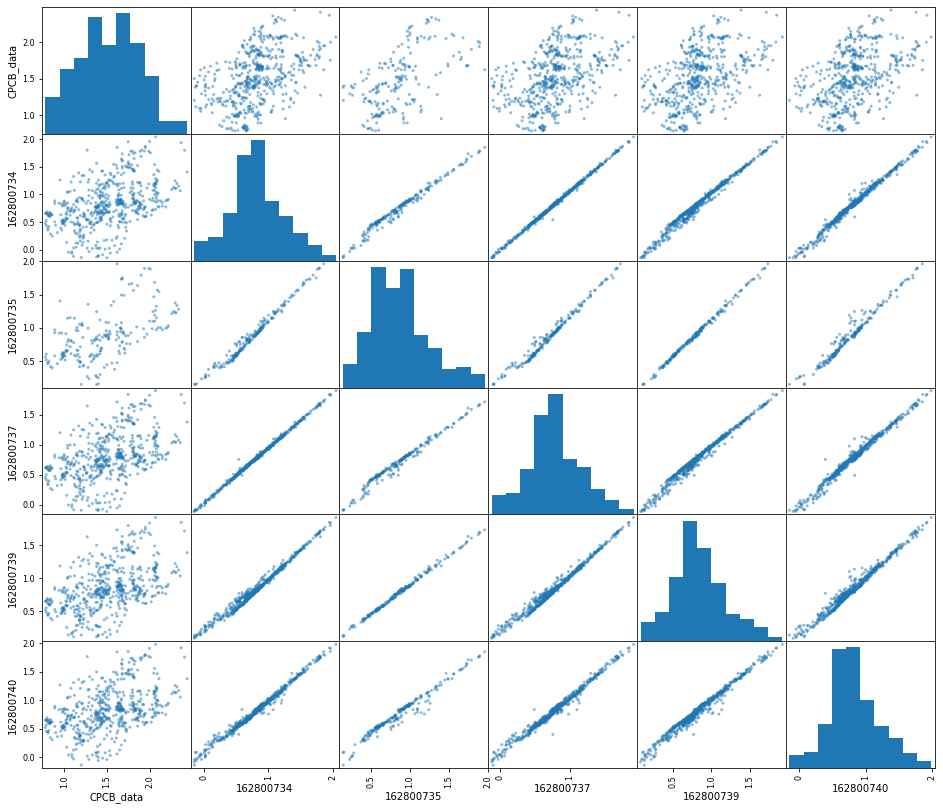

In [295]:
pd.plotting.scatter_matrix(reshaped_df5,figsize=(16,14))

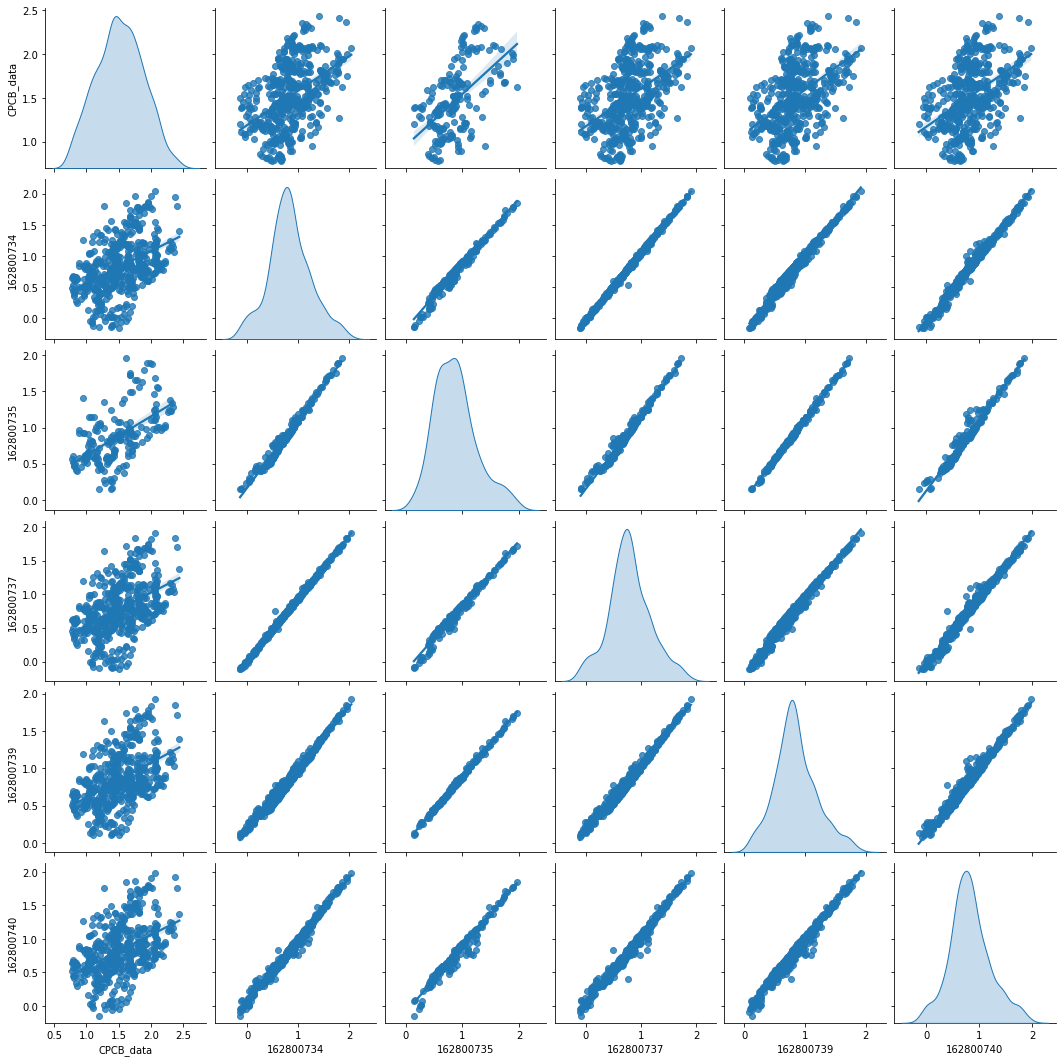

In [296]:
sns.pairplot(reshaped_df5,kind='reg',diag_kind='kde')

In [176]:
'''Outlier Detection '''
# IQR
Q1 = np.percentile(reshaped_df['CPCB_data'], 25,interpolation = 'midpoint')
 
Q3 = np.percentile(reshaped_df['CPCB_data'], 75,interpolation = 'midpoint')

IQR = Q3 - Q1
 
print("Old Shape: ", reshaped_df.shape)
 
# Upper bound
upper = np.where(reshaped_df['CPCB_data'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(reshaped_df['CPCB_data'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
reshaped_df.drop(upper[0], inplace = True)
reshaped_df.drop(lower[0], inplace = True)
 
print("New Shape: ", reshaped_df.shape)

Old Shape:  (865, 7)
New Shape:  (865, 7)


In [177]:
'''Outlier Detection '''
# IQR
Q1 = np.percentile(reshaped_df['162800734'], 25,interpolation = 'midpoint')
 
Q3 = np.percentile(reshaped_df['162800734'], 75,interpolation = 'midpoint')

IQR = Q3 - Q1
 
print("Old Shape: ", reshaped_df.shape)
 
# Upper bound
upper = np.where(reshaped_df['162800734'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(reshaped_df['162800734'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
reshaped_df.drop(upper[0], inplace = True)
reshaped_df.drop(lower[0], inplace = True)
 
print("New Shape: ", reshaped_df.shape)

Old Shape:  (865, 7)
New Shape:  (865, 7)


In [98]:
final_df2 = pd.merge(df4, df2, on = ["dt_time"], how = "outer")
final_df2

,deviceid,sensor no.,dt_time,coop1,coop2,gain factor,total sensor nA signal,sensitivity,sensor gas value ppm,ppb equivalent value,humidity,temp,CO
0,48551903D2CB,162800740.0,2022-12-29 13:00:00,243.500000,440.500000,0.8,246.250000,621.0,0.396538,396.537842,22.333333,43.900000,1.29
1,485519C84D2E,162800739.0,2022-12-29 13:00:00,187.909091,548.272727,0.8,450.454545,585.0,0.770008,770.007770,22.209091,44.763636,1.29
2,4091514F1FB1,162800734.0,2022-12-29 13:00:00,243.285714,478.428571,0.8,293.928571,543.0,0.541305,541.304920,24.585714,41.978571,1.29
3,48551903D8F9,162800737.0,2022-12-29 13:00:00,151.750000,524.000000,0.8,465.312500,616.0,0.755377,755.377435,25.900000,41.288889,1.29
4,48551903D2CB,162800740.0,2022-12-29 13:15:00,116.666667,3218.133333,0.8,3876.833333,621.0,6.242888,6242.887815,28.426667,39.353333,1.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054,NaN,NaN,2023-01-06 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43
3055,NaN,NaN,2023-01-06 23:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.47
3056,NaN,NaN,2023-01-06 23:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.53
3057,NaN,NaN,2023-01-06 23:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.59


In [99]:
final_df2.drop(final_df2.columns[[0,3,4,5,6,7,8,9,11,12]], axis=1, inplace=True)
final_df2

,sensor no.,dt_time,humidity
0,162800740.0,2022-12-29 13:00:00,22.333333
1,162800739.0,2022-12-29 13:00:00,22.209091
2,162800734.0,2022-12-29 13:00:00,24.585714
3,162800737.0,2022-12-29 13:00:00,25.900000
4,162800740.0,2022-12-29 13:15:00,28.426667
...,...,...,...
3054,NaN,2023-01-06 23:00:00,NaN
3055,NaN,2023-01-06 23:15:00,NaN
3056,NaN,2023-01-06 23:30:00,NaN
3057,NaN,2023-01-06 23:45:00,NaN


In [100]:

final_df2.dtypes

sensor no.           float64
dt_time       datetime64[ns]
humidity             float64
dtype: object

In [122]:
humidity_df = final_df2.pivot(index=['dt_time'],columns = 'sensor no.',values='humidity')
humidity_df.columns.name = None
humidity_df.head()

,NaN,162800734.0,162800735.0,162800737.0,162800739.0,162800740.0
dt_time,,,,,,
2022-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-29 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-29 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-29 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-29 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
humidity_df.drop(humidity_df.columns[[0]], axis=1, inplace=True)
humidity_df

,162800734.0,162800735.0,162800737.0,162800739.0,162800740.0
dt_time,,,,,
2022-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN
2022-12-29 00:15:00,NaN,NaN,NaN,NaN,NaN
2022-12-29 00:30:00,NaN,NaN,NaN,NaN,NaN
2022-12-29 00:45:00,NaN,NaN,NaN,NaN,NaN
2022-12-29 01:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2023-01-06 23:00:00,NaN,NaN,NaN,NaN,NaN
2023-01-06 23:15:00,NaN,NaN,NaN,NaN,NaN
2023-01-06 23:30:00,NaN,NaN,NaN,NaN,NaN


In [124]:
humidity_df = humidity_df.dropna()
humidity_df

,162800734.0,162800735.0,162800737.0,162800739.0,162800740.0
dt_time,,,,,
2022-12-29 13:30:00,29.553333,30.980000,28.593333,27.660000,29.373333
2022-12-29 13:45:00,32.626667,34.166667,31.340000,30.173333,33.073333
2022-12-29 14:00:00,35.953333,38.113333,34.840000,33.573333,36.853333
2022-12-29 14:15:00,34.120000,37.046667,33.393333,33.280000,35.813333
2022-12-29 14:30:00,33.693333,36.253333,32.533333,32.120000,34.473333
...,...,...,...,...,...
2023-01-01 10:30:00,38.506667,43.946667,40.826667,42.180000,38.606667
2023-01-01 10:45:00,37.346667,41.113333,38.806667,39.220000,38.460000
2023-01-01 11:00:00,33.806667,38.720000,34.546667,36.593333,35.960000


In [103]:
import seaborn as sns

<AxesSubplot:>

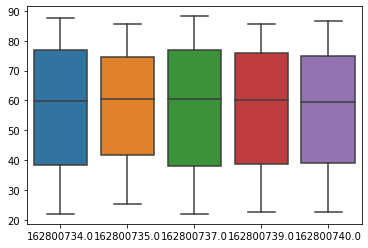

In [125]:
sns.boxplot(data=humidity_df,)

In [126]:
final_df3 = pd.merge(df4, df2, on = ["dt_time"], how = "outer")
final_df3

,deviceid,sensor no.,dt_time,coop1,coop2,gain factor,total sensor nA signal,sensitivity,sensor gas value ppm,ppb equivalent value,humidity,temp,CO
0,48551903D2CB,162800740.0,2022-12-29 13:00:00,243.500000,440.500000,0.8,246.250000,621.0,0.396538,396.537842,22.333333,43.900000,1.29
1,485519C84D2E,162800739.0,2022-12-29 13:00:00,187.909091,548.272727,0.8,450.454545,585.0,0.770008,770.007770,22.209091,44.763636,1.29
2,4091514F1FB1,162800734.0,2022-12-29 13:00:00,243.285714,478.428571,0.8,293.928571,543.0,0.541305,541.304920,24.585714,41.978571,1.29
3,48551903D8F9,162800737.0,2022-12-29 13:00:00,151.750000,524.000000,0.8,465.312500,616.0,0.755377,755.377435,25.900000,41.288889,1.29
4,48551903D2CB,162800740.0,2022-12-29 13:15:00,116.666667,3218.133333,0.8,3876.833333,621.0,6.242888,6242.887815,28.426667,39.353333,1.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054,NaN,NaN,2023-01-06 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43
3055,NaN,NaN,2023-01-06 23:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.47
3056,NaN,NaN,2023-01-06 23:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.53
3057,NaN,NaN,2023-01-06 23:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.59


In [127]:
final_df3.drop(final_df3.columns[[0,3,4,5,6,7,8,9,10,12]], axis=1, inplace=True)
final_df3

,sensor no.,dt_time,temp
0,162800740.0,2022-12-29 13:00:00,43.900000
1,162800739.0,2022-12-29 13:00:00,44.763636
2,162800734.0,2022-12-29 13:00:00,41.978571
3,162800737.0,2022-12-29 13:00:00,41.288889
4,162800740.0,2022-12-29 13:15:00,39.353333
...,...,...,...
3054,NaN,2023-01-06 23:00:00,NaN
3055,NaN,2023-01-06 23:15:00,NaN
3056,NaN,2023-01-06 23:30:00,NaN
3057,NaN,2023-01-06 23:45:00,NaN


In [128]:
temp_df = final_df3.pivot(index=['dt_time'],columns = 'sensor no.',values='temp')
#reshaped_df3.columns.name = None
temp_df.head(60)

sensor no.,NaN,162800734.0,162800735.0,162800737.0,162800739.0,162800740.0
dt_time,,,,,,
2022-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-29 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-29 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-29 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-29 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-29 01:15:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-29 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-29 01:45:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-29 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
temp_df.drop(temp_df.columns[[0]], axis=1, inplace=True)
temp_df

sensor no.,162800734.0,162800735.0,162800737.0,162800739.0,162800740.0
dt_time,,,,,
2022-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN
2022-12-29 00:15:00,NaN,NaN,NaN,NaN,NaN
2022-12-29 00:30:00,NaN,NaN,NaN,NaN,NaN
2022-12-29 00:45:00,NaN,NaN,NaN,NaN,NaN
2022-12-29 01:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2023-01-06 23:00:00,NaN,NaN,NaN,NaN,NaN
2023-01-06 23:15:00,NaN,NaN,NaN,NaN,NaN
2023-01-06 23:30:00,NaN,NaN,NaN,NaN,NaN


In [130]:
temp_df = temp_df.dropna()
temp_df

sensor no.,162800734.0,162800735.0,162800737.0,162800739.0,162800740.0
dt_time,,,,,
2022-12-29 13:30:00,37.546667,36.980000,38.480000,38.586667,37.460000
2022-12-29 13:45:00,37.686667,36.866667,38.760000,38.873333,37.120000
2022-12-29 14:00:00,37.773333,36.720000,38.726667,38.793333,37.033333
2022-12-29 14:15:00,38.226667,36.700000,38.940000,38.466667,37.113333
2022-12-29 14:30:00,37.953333,36.613333,38.840000,38.740000,37.213333
...,...,...,...,...,...
2023-01-01 10:30:00,31.233333,28.200000,30.086667,28.853333,30.820000
2023-01-01 10:45:00,33.160000,31.113333,32.806667,32.040000,32.133333
2023-01-01 11:00:00,34.706667,32.060000,34.920000,33.066667,33.173333


<AxesSubplot:xlabel='sensor no.'>

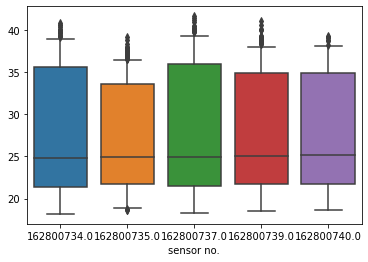

In [135]:
sns.boxplot(data=temp_df,whis=0.25)